# Abstract

En el dataset que se proporciona en este trabajo se ve reflejada la situación de la educación chilena para el periodo correspondiente al año 2021, dataset que es generado por el gobierno de ese país. La misma se encuentra disponible, para su descarga, en la página oficial [datosabiertos.mineduc.cl](https://datosabiertos.mineduc.cl/rendimiento-por-estudiante-2/), allí también se podrá encontrar un pdf con los detalles del significado de cada una de las columnas del dataset. Esta base de datos contiene información sobre el género de los estudiantes, asi como también de las ramas de estudio elegidas, como los lugares a donde acuden a clases y su rendimiento académico. Es importante destacar que no solo se verá información de los alumnos menores de edad, sino que también se intentará analizar la situación de aquellos alumnos que están estudiando el colegio siendo adultos.

En los últimos años se ha puesto foco en la perspectiva de género, lo que permite intentar mejorar la vida de las personas en general. A su vez, "ayuda a comprender más profundamente tanto la vida de las mujeres como la de los hombres y las relaciones que se dan entre ambos. Este enfoque cuestiona los estereotipos con que somos educados y abre la posibilidad de elaborar nuevos contenidos de socialización y relación entre los seres humanos." [(cit.)](https://www.gob.mx/conavim/articulos/que-es-la-perspectiva-de-genero-y-por-que-es-necesario-implementarla) La idea de darle una mirada de género a la información es intentar que el plano educacional sean un poco mejor tanto para los hombres como para las mujeres y lograr el objetivo de llegar a la igualdad entre el hombre y la mujer. 

Atento a la necesidad de tener en cuenta la perspectiva de género es que se precisa conocer la situación al momento de la realización de esa base de datos con respecto a la educación diferenciada por género contestando al siguiente interrogante:

1) Teniendo en cuenta la perspectiva de género, ¿Como es la situación académica general de los estudiantes de chile?¿Las mujeres tienen un mejor rendimiento que los hombres?


#Imports y lecturas iniciales

In [1]:
#Se realizan los import necesarios para poder realizar el presente trabajo y se importa la base de datos
#DATOS
import numpy as np
import pandas as pd
#Visual
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Archivo de datos
rendimiento=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/20220302_Rendimiento_2021_20220131_WEB.csv",sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
#Se desea conocer una aproximación sobre la información contenida en la base
rendimiento.head()

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"6,5",98,P,P,0
1,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"6,5",98,P,P,0
2,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,"5,8",90,P,P,0
3,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0,0,Y,Y,0
4,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,1101,IQUIQUE,400,410,41001,"4,1",70,R,R,0


In [3]:
#se desea conocer el tamaño de la base de datos
rendimiento.shape

(3237043, 37)

In [4]:
rendimiento.describe()

,AGNO,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,...,MRUN,GEN_ALU,FEC_NAC_ALU,COD_REG_ALU,COD_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,ASISTENCIA,COD_MEN
count,3237043.0,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,...,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06,3.237043e+06
mean,2021.0,1.171900e+04,4.449510e+00,9.436881e+00,9.629977e+01,9.636610e+03,9.492809e+01,2.838611e+00,1.947159e+00,7.798166e-02,...,1.321826e+07,1.486760e+00,2.007962e+05,9.466355e+00,9.664326e+03,2.828653e+01,2.966104e+01,2.966619e+03,8.455686e+01,1.278794e+06
std,0.0,9.032607e+03,2.887394e+00,3.997979e+00,3.976998e+01,3.979794e+03,3.936337e+01,1.108436e+00,9.624136e-01,2.681428e-01,...,7.648322e+06,4.998291e-01,5.811369e+02,4.014668e+00,3.997219e+03,1.190056e+02,1.248256e+02,1.248470e+04,2.438291e+01,8.287513e+06
min,2021.0,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.101000e+03,1.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,...,2.500000e+01,0.000000e+00,1.900010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2021.0,4.622000e+03,2.000000e+00,6.000000e+00,6.100000e+01,6.108000e+03,6.100000e+01,2.000000e+00,1.000000e+00,0.000000e+00,...,6.600883e+06,1.000000e+00,2.005100e+05,6.000000e+00,6.108000e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.500000e+01,0.000000e+00
50%,2021.0,9.829000e+03,4.000000e+00,1.000000e+01,1.010000e+02,1.010100e+04,9.300000e+01,3.000000e+00,2.000000e+00,0.000000e+00,...,1.320188e+07,1.000000e+00,2.009010e+05,1.000000e+01,1.010400e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,0.000000e+00
75%,2021.0,1.672900e+04,7.000000e+00,1.300000e+01,1.310000e+02,1.312200e+04,1.340000e+02,3.000000e+00,2.000000e+00,0.000000e+00,...,1.981134e+07,2.000000e+00,2.012020e+05,1.300000e+01,1.312200e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.900000e+01,0.000000e+00
max,2021.0,4.195500e+04,9.000000e+00,1.600000e+01,1.630000e+02,1.630500e+04,1.510000e+02,6.000000e+00,5.000000e+00,1.000000e+00,...,2.662134e+07,2.000000e+00,2.018120e+05,1.600000e+01,1.630500e+04,9.000000e+02,9.100000e+02,9.100500e+04,1.000000e+02,7.200700e+07


In [5]:
rendimiento.isna().sum()

AGNO              0
RBD               0
DGV_RBD           0
NOM_RBD           0
COD_REG_RBD       0
NOM_REG_RBD_A     0
COD_PRO_RBD       0
COD_COM_RBD       0
NOM_COM_RBD       0
COD_DEPROV_RBD    0
NOM_DEPROV_RBD    0
COD_DEPE          0
COD_DEPE2         0
RURAL_RBD         0
ESTADO_ESTAB      0
COD_ENSE          0
COD_ENSE2         0
COD_GRADO         0
LET_CUR           0
COD_JOR           0
COD_TIP_CUR       0
COD_DES_CUR       0
MRUN              0
GEN_ALU           0
FEC_NAC_ALU       0
EDAD_ALU          0
COD_REG_ALU       0
COD_COM_ALU       0
NOM_COM_ALU       0
COD_RAMA          0
COD_SEC           0
COD_ESPE          0
PROM_GRAL         0
ASISTENCIA        0
SIT_FIN           0
SIT_FIN_R         0
COD_MEN           0
dtype: int64

In [6]:
#Se averigua si hay datos duplicados
rendimiento.duplicated().sum()

0

#Análisis general de la distribución del alumnado según el género

Como primera aproximación se analizará las cantidades de alumnos según el género a nivel nacional y posteriormente a nivel regional. En cuanto a las columnas de la tabla GEN_ALU contendrá la información del género del alumno mientras que NOM_REG_RBD_A contendra un diminutivo de la región.

In [7]:
#Debemos establecer el criterio de que se contaran los alumnos por género
criterio_genero_nacional={'GEN_ALU':'count'}
distribucion_genero_nacional= rendimiento.groupby(['GEN_ALU']).agg(criterio_genero_nacional)
distribucion_genero_nacional.columns=['CANTIDAD']
distribucion_genero_nacional=distribucion_genero_nacional.reset_index()

#Al estar la información del género con números y para hacerla mas legible se cambiara de formato
dict_genalu={0:'sin información',1:'Masculino',2:'Femenino'}
distribucion_genero_nacional['GEN_ALU'] = distribucion_genero_nacional.GEN_ALU.replace(dict_genalu)
distribucion_genero_nacional

,GEN_ALU,CANTIDAD
0,sin información,7
1,Masculino,1661367
2,Femenino,1575669


In [8]:
#Debemos establecer el criterio de que se contaran los alumnos por género
criterio_genero_regiones={'GEN_ALU':'count'}
distribucion_genero_regiones= rendimiento.groupby(['NOM_REG_RBD_A','GEN_ALU']).agg(criterio_genero_regiones)
distribucion_genero_regiones.columns=['CANTIDAD']
distribucion_genero_regiones=distribucion_genero_regiones.reset_index()

#Al estar la información del género con números y para hacerla mas legible se cambiara de formato
dict_genalu_regiones={0:'sin información',1:'Masculino',2:'Femenino'}
distribucion_genero_regiones['GEN_ALU'] = distribucion_genero_regiones.GEN_ALU.replace(dict_genalu_regiones)
distribucion_genero_regiones

,NOM_REG_RBD_A,GEN_ALU,CANTIDAD
0,ANTOF,Masculino,60740
1,ANTOF,Femenino,57267
2,ARAUC,sin información,1
3,ARAUC,Masculino,98715
4,ARAUC,Femenino,94226
5,ATCMA,Masculino,30422
6,ATCMA,Femenino,28952
7,AYP,Masculino,24967
8,AYP,Femenino,22724
9,AYSEN,Masculino,11309


## Gráfico correspondiente a la distribución a nivel nacional 

In [9]:
figura_genero_nacional=px.pie(distribucion_genero_nacional, values='CANTIDAD', names='GEN_ALU', title='Distribución por genero a nivel nacional',height=400,width=400)
figura_genero_nacional.show()

## Gráfico correspondiente a la distribución a nivel Regional 

In [10]:
fig_distribucion_genero_regiones = px.bar(distribucion_genero_regiones, x='NOM_REG_RBD_A', y='CANTIDAD', color='GEN_ALU', barmode='group',
             height=850,width=1500, text_auto=True,title="Distribución del alumno con respecto a su genero en las regiones", labels={'CANTIDAD':'Cantidad de alumnos','NOM_REG_RBD_A':'Regiones','GEN_ALU':'Género'})
fig_distribucion_genero_regiones.show()

## Análisis de los gráficos de distribución general en razon del género

De los gráficos se desprende que a nivel de las regiones de chile existe una marcada predominancia de los hombres lo que se replica a nivel nacional dando un total de 51,3% de los alumnos. Es importannte destacar también que dentro de la región metropolitana se encuentra la mayor cantidad de alumnos en general ya que se encuentra la capital del pais siendo el area más populosa en si.

# Distribución de los alumnos adultos según tipo y nivel de enseñanza

In [11]:
#Datos generalizados
codense2_gral_aux=rendimiento[(rendimiento["COD_ENSE2"].isin([3,6,8]))]
codense2_hombres_aux=rendimiento[(rendimiento["COD_ENSE2"].isin([3,6,8])) & (rendimiento["GEN_ALU"]==1)]
codense2_mujeres_aux=rendimiento[(rendimiento["COD_ENSE2"].isin([3,6,8])) & (rendimiento["GEN_ALU"]==2)]
criterio_codense2_gral={'COD_ENSE2':'count'}
situacion_codense2_gral= codense2_gral_aux.groupby(['COD_ENSE2']).agg(criterio_codense2_gral)
situacion_codense2_hombres= codense2_hombres_aux.groupby(['COD_ENSE2']).agg(criterio_codense2_gral)
situacion_codense2_mujeres= codense2_mujeres_aux.groupby(['COD_ENSE2']).agg(criterio_codense2_gral)
situacion_codense2_gral.columns=['CANTIDAD']
situacion_codense2_hombres.columns=['CANTIDAD']
situacion_codense2_mujeres.columns=['CANTIDAD']
#convierto la serie en varias columnas nuevamente
situacion_codense2_gral=situacion_codense2_gral.reset_index()
situacion_codense2_mujeres=situacion_codense2_mujeres.reset_index()
situacion_codense2_hombres=situacion_codense2_hombres.reset_index()

dict_codense_codense2={3:'Básica',6:'Media HC',8:'Media TP y Artística'}
situacion_codense2_gral['COD_ENSE2'] = situacion_codense2_gral.COD_ENSE2.replace(dict_codense_codense2)
situacion_codense2_hombres['COD_ENSE2'] = situacion_codense2_hombres.COD_ENSE2.replace(dict_codense_codense2)
situacion_codense2_mujeres['COD_ENSE2'] = situacion_codense2_mujeres.COD_ENSE2.replace(dict_codense_codense2)


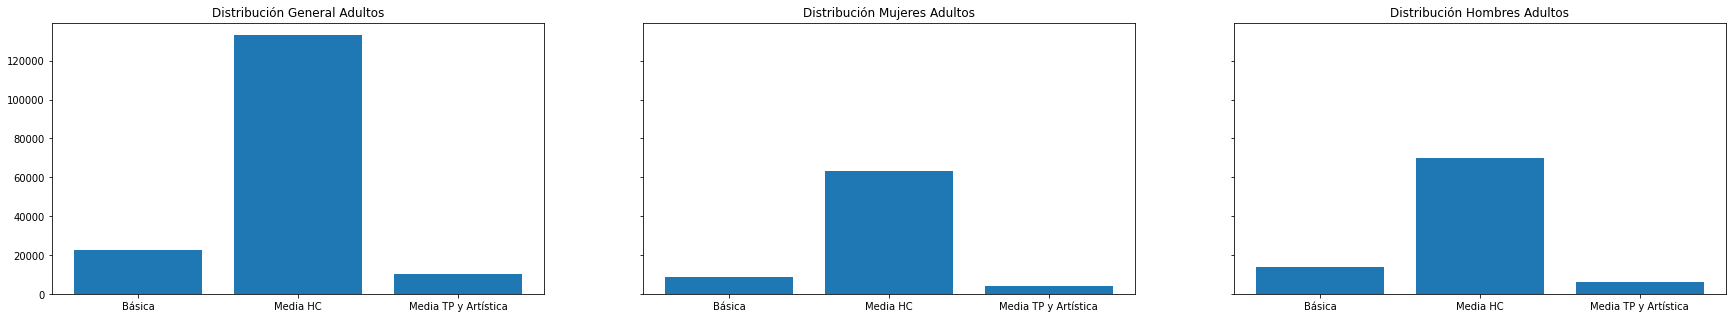

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(50, 3), sharey=True)

axs[0].bar(situacion_codense2_gral['COD_ENSE2'], situacion_codense2_gral['CANTIDAD'])
axs[1].bar(situacion_codense2_mujeres['COD_ENSE2'], situacion_codense2_mujeres['CANTIDAD'])
axs[2].bar(situacion_codense2_hombres['COD_ENSE2'], situacion_codense2_hombres['CANTIDAD'])

axs[0].title.set_text('Distribución General Adultos')
axs[1].title.set_text('Distribución Mujeres Adultos')
axs[2].title.set_text('Distribución Hombres Adultos')
fig.set_figheight(5)
fig.set_figwidth(30)

# Análisis de los gráficos
Para el período 2021 la distribución del alumnado adulto se encuentra en su mayoria dentro de la educación media Humanístico cientifica, reportandose niveles muy bajos, comparandolo con la HC, de las otras dos ramas.

# Análisis de la distribución de los alumnos a nivel nacional con respecto a la rama técnico profesional

Esto aplica solo para enseñanza media técnico-profesional y artística. Primero veremos un punto de vista generalizado y posteriormente nos enfocaremos en la enseñanza del sector adulto.

In [13]:
#Estamos buscando agrupar por rama segun sexo la enseñanza media técnico profesional
rama_gral_aux=rendimiento[(rendimiento["COD_ENSE2"].isin([7,8])) & (rendimiento["COD_RAMA"].isin([400,500,600,700,800,900])) & (rendimiento["GEN_ALU"].isin([1,2])) ]
#Habiendo obtenido el universo de información que necesitamos, solo nos quedaremos con las columnas que queremos y ademas agruparemos segun la rama de estudio y el genero del alumno
criterio_rama_gral={'COD_RAMA':'count'}
situacion_rama_gral= rama_gral_aux.groupby(['COD_RAMA','GEN_ALU']).agg(criterio_rama_gral)
situacion_rama_gral.columns=['CANTIDAD']
#convierto la serie en varias columnas nuevamente
situacion_rama_gral=situacion_rama_gral.reset_index()


In [14]:
#Se modifican los codigos por los nombres reales para dar una mejor lectura
dict_genalu_sit_gral_rama={1:'Masculino',2:'Femenino'}
situacion_rama_gral['GEN_ALU'] = situacion_rama_gral.GEN_ALU.replace(dict_genalu_sit_gral_rama)
dict_codrama_sit_gral_rama = {400:'Comercial', 500:'Industrial', 600:'Técnica', 700:'Agrícola', 800: 'Marítima',900:'Artística'}
situacion_rama_gral['COD_RAMA'] = situacion_rama_gral.COD_RAMA.replace(dict_codrama_sit_gral_rama)
situacion_rama_gral

,COD_RAMA,GEN_ALU,CANTIDAD
0,Comercial,Masculino,19922
1,Comercial,Femenino,28149
2,Industrial,Masculino,58786
3,Industrial,Femenino,14362
4,Técnica,Masculino,11237
5,Técnica,Femenino,35065
6,Agrícola,Masculino,5626
7,Agrícola,Femenino,3205
8,Marítima,Masculino,1351
9,Marítima,Femenino,644


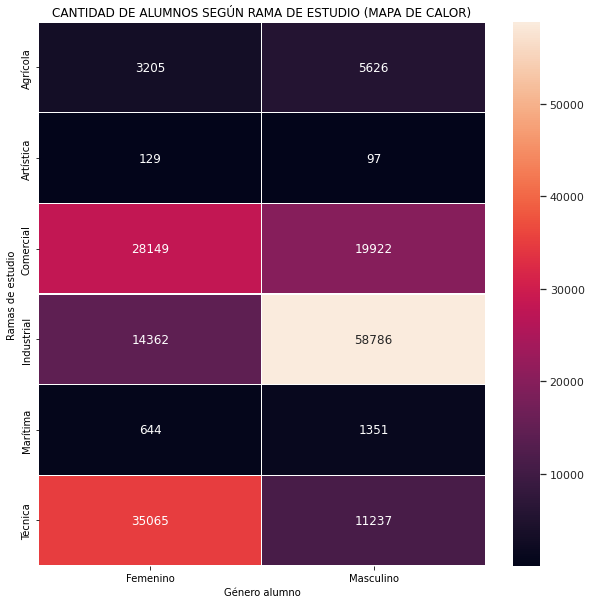

In [15]:
situacion_rama_gral_pivot = situacion_rama_gral.pivot("COD_RAMA", "GEN_ALU", 'CANTIDAD')
f, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(style="ticks", font_scale=1)
mapacalor_situacion_rama_gral=sns.heatmap(situacion_rama_gral_pivot, annot=True, fmt=".0f", linewidths=.2, ax=ax)
mapacalor_situacion_rama_gral.set(xlabel="Género alumno",ylabel="Ramas de estudio",title="CANTIDAD DE ALUMNOS SEGÚN RAMA DE ESTUDIO (MAPA DE CALOR)")
plt.show()

In [16]:
#Estamos buscando agrupar por rama segun sexo la enseñanza técnico profesional de adultos, por lo tanto, primero haremos una diferenciación de la información general que necesitamos
adultotp_aux=rendimiento[(rendimiento["COD_ENSE2"]==8) & (rendimiento["COD_RAMA"].isin([400,500,600,700,800,900])) & (rendimiento["GEN_ALU"].isin([1,2])) ]
#Habiendo obtenido el universo de información que necesitamos, solo nos quedaremos con las columnas que queremos y ademas agruparemos segun la rama de estudio y el genero del alumno
criterio_adultotp={'COD_RAMA':'count'}
situacion_adultotp= adultotp_aux.groupby(['COD_RAMA','GEN_ALU']).agg(criterio_adultotp)
situacion_adultotp.columns=['CANTIDAD']
#convierto la serie en varias columnas nuevamente
situacion_adultotp=situacion_adultotp.reset_index()


In [17]:
#Se modifican los codigos por los nombres reales para dar una mejor lectura
dict_genalu_situacion_adultotp={1:'Masculino',2:'Femenino'}
situacion_adultotp['GEN_ALU'] = situacion_adultotp.GEN_ALU.replace(dict_genalu_situacion_adultotp)
dict_codrama_situacion_adultotp = {400:'Comercial', 500:'Industrial', 600:'Técnica', 700:'Agrícola', 800: 'Marítima'}
situacion_adultotp['COD_RAMA'] = situacion_adultotp.COD_RAMA.replace(dict_codrama_situacion_adultotp)
situacion_adultotp

,COD_RAMA,GEN_ALU,CANTIDAD
0,Comercial,Masculino,759
1,Comercial,Femenino,1205
2,Industrial,Masculino,3999
3,Industrial,Femenino,613
4,Técnica,Masculino,747
5,Técnica,Femenino,2597
6,Agrícola,Masculino,578
7,Agrícola,Femenino,47
8,Marítima,Masculino,3
9,Marítima,Femenino,11


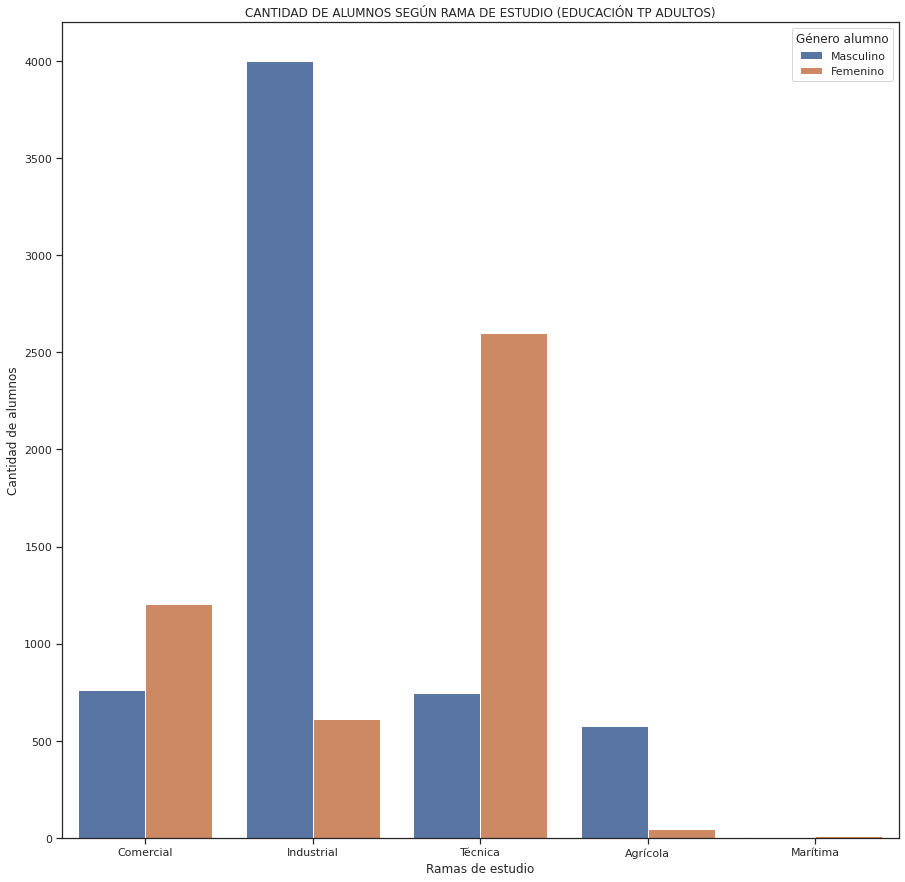

In [18]:
f, ax = plt.subplots(figsize=(15, 15))
fig_situacion_adultotp=sns.barplot(data=situacion_adultotp, x='COD_RAMA', y='CANTIDAD', hue='GEN_ALU')
fig_situacion_adultotp.set(xlabel="Ramas de estudio",ylabel="Cantidad de alumnos",title="CANTIDAD DE ALUMNOS SEGÚN RAMA DE ESTUDIO (EDUCACIÓN TP ADULTOS)")
plt.legend(title="Género alumno")
plt.show()

## Análisis de los gráficos
A nivel nacional, tanto en la educación de los adultos como en la situación general, se ve una elección de las mujeres hacia el lado técnico (donde en la situación general llega a triplicar con respecto a la cantidad de elecciones por parte de los hombres) seguido por el lado comercial y, por último, la rama Artistica. Estos resultados se ven replicados en la educación de adultos aunque en ésta no se encuentra la rama artistica.

Por el lado de los hombres se ve una clara elección en ambas situaciones de la rama industrial, seguido por la agricola y por la maritima, aunque en esta última rama en la sección adultos las mujeres son las que mas eligieron la rama maritima pero hay que tener en cuenta que las cantidades en este caso son minimas ya que son 11 contra 3 elecciones.

# Análisis de la distribución de alumnos según el código de dependencia en la cual asiste
## Códigos de Dependencia
| Código de Dependencia  |   Dependencia  |
|---|---|
| 1   |   Corporación Municipal  |
| 2   |   Municipal DAEM  |
| 3   |   Particular Subvencionado  |
| 4   |   Particular Pagado (o no subvencionado)  |
| 5   |   Corporación de Administración Delegada (DL 3166)  |
| 6  |   Servicio Local de Educación  |

## Género alumno

| Código de genero  |   genero  |
|---|---|
| 0   |   Sin información  |
| 1   |   Masculino  |
| 2   |   Femenino  |

In [19]:
#Se arma el criterio de selección de la información necesaria para el análisis
codigo_dep_criterio={'GEN_ALU':'count'}
cod_dep=rendimiento.groupby(['COD_DEPE','GEN_ALU']).agg(codigo_dep_criterio)
cod_dep.columns=['CANTIDAD']
cod_dep=cod_dep.reset_index()
#Se modifica los codigos para pasarlos a referencias que sean más claras ante una lectura
dict_codep={1:'Corporación Municipal',2:'Municipal DAEM', 3:'Particular Subvencionado', 4:'Particular Pagado (o no subvencionado)',5:'Corporación de Administración Delegada (DL 3166)',6:'Servicio Local de Educación'}
cod_dep['COD_DEPE'] = cod_dep.COD_DEPE.replace(dict_codep)
dict_genalu_codep={0:"Sin información",1:'Masculino',2:'Femenino'}
cod_dep['GEN_ALU'] = cod_dep.GEN_ALU.replace(dict_genalu_codep)
cod_dep

,COD_DEPE,GEN_ALU,CANTIDAD
0,Corporación Municipal,Sin información,1
1,Corporación Municipal,Masculino,183389
2,Corporación Municipal,Femenino,167986
3,Municipal DAEM,Sin información,2
4,Municipal DAEM,Masculino,366317
5,Municipal DAEM,Femenino,330120
6,Particular Subvencionado,Sin información,4
7,Particular Subvencionado,Masculino,851513
8,Particular Subvencionado,Femenino,837485
9,Particular Pagado (o no subvencionado),Masculino,145083


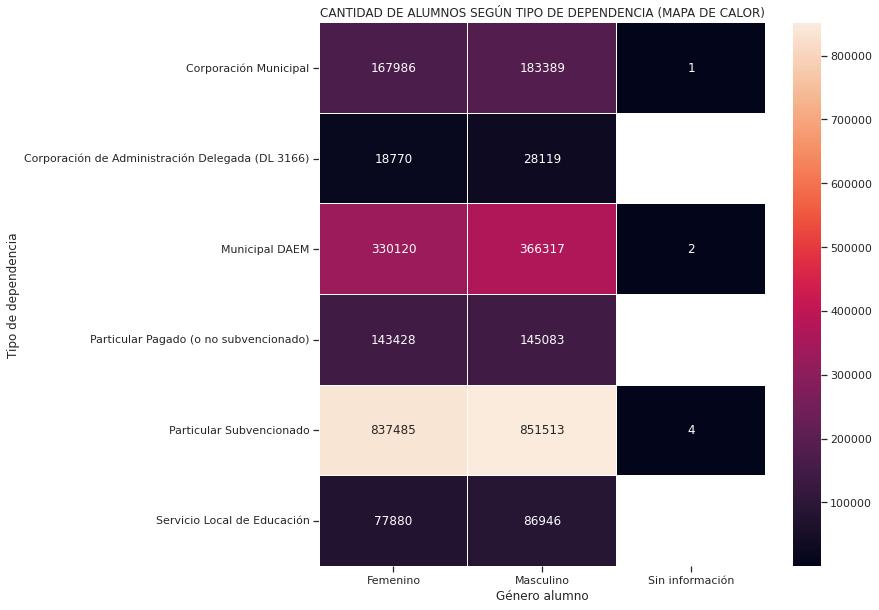

In [20]:
codigodependencia = cod_dep.pivot("COD_DEPE", "GEN_ALU", 'CANTIDAD')
f, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(style="ticks", font_scale=1)
mapacalorcodigo=sns.heatmap(codigodependencia, annot=True, fmt=".0f", linewidths=.2, ax=ax)
mapacalorcodigo.set(xlabel="Género alumno",ylabel="Tipo de dependencia",title="CANTIDAD DE ALUMNOS SEGÚN TIPO DE DEPENDENCIA (MAPA DE CALOR)")
plt.show()

## Análisis del gráfico
Del gráfico que antecede se desprende que claramente hay una cantidad muchisimo mayor de alumnos que se encuentran dentro de dependencias particulares subvencionadas. Seguido por las que son de la clase Municipal DAEM.

#Análisis de la selección de jornada a la cual se asiste
En el presente apartado se mostrara la información de la distribución del alumnado en los diferentes turnos que se ofrecen.

In [21]:
#Se busca conocer la distribución de los alumnos segun la jornada donde asiste
criterio_jornada_establecimiento={'COD_JOR':'count'}
jornada_establecimiento=rendimiento.groupby(['GEN_ALU','COD_JOR']).agg(criterio_jornada_establecimiento)
jornada_establecimiento.columns=['CANTIDAD']
jornada_establecimiento=jornada_establecimiento.reset_index()
dict_codjor_establecimiento={1:'Mañana', 2:'Tarde',3:'Mañana y tarde',4:'Vespertina/Nocturna'}
jornada_establecimiento['COD_JOR'] = jornada_establecimiento.COD_JOR.replace(dict_codjor_establecimiento)
dict_genalu_jornada={0:"Sin información",1:'Masculino',2:'Femenino'}
jornada_establecimiento['GEN_ALU'] = jornada_establecimiento.GEN_ALU.replace(dict_genalu_jornada)
jornada_establecimiento

,GEN_ALU,COD_JOR,CANTIDAD
0,Sin información,Mañana,1
1,Sin información,Mañana y tarde,6
2,Masculino,Mañana,291753
3,Masculino,Tarde,87166
4,Masculino,Mañana y tarde,1226374
5,Masculino,Vespertina/Nocturna,56074
6,Femenino,Mañana,281510
7,Femenino,Tarde,79140
8,Femenino,Mañana y tarde,1161166
9,Femenino,Vespertina/Nocturna,53853


In [22]:
figura_jornada_gral=px.bar(jornada_establecimiento,x='COD_JOR',y='CANTIDAD',color='GEN_ALU',title="Distribución de los alumnos según la jornada de estudio",labels={'CANTIDAD':'Cantidad de alumnos','COD_JOR':'Código de Jornada','GEN_ALU':'Género'})
figura_jornada_gral.show()

#Análisis del gráfico
Del gráfico que antecede se desprende que la mayor parte de los alumnos (tanto hombres como mujeres) eligen el turno mañana y tarde, seguido por el turno solo mañana. La diferencia entre ambos turnos es de casi 5 veces en favor del turno mañana y tarde. En cuanto a la diferencia entre hombres y mujeres casi la misma cantidad de ellos eligio el turno mañana y tarde. Por último, el que menos fue elegido es el nocturno.

# Análisis alumnos reprobados de los estudiantes adultos de la enseñanza media técnico profesional y Humanístico cientifico.

Se busca conocer la distribución de los reprobados, según el genero del alumno, dentro de las diferentes enseñanzas elegidas

In [23]:
#Estamos buscando agrupar por rama segun sexo la enseñanza técnico profesional de adultos y la Educación Media Humanístico Científica Adultos, por lo tanto, primero haremos una diferenciación de la información general que necesitamos
adultotphc_aux=rendimiento[(rendimiento["COD_ENSE2"].isin([6,8])) &  (rendimiento["GEN_ALU"].isin([1,2])) &  (rendimiento["SIT_FIN"]=="R")]
#Habiendo obtenido el universo de información que necesitamos, solo nos quedaremos con las columnas que queremos y ademas agruparemos segun la rama de enseñanza y el genero del alumno
criterio_adultotphc={'COD_ENSE2':'count'}
situacion_adultotphc= adultotphc_aux.groupby(['COD_ENSE2','GEN_ALU']).agg(criterio_adultotphc)
situacion_adultotphc.columns=['CANTIDAD']
#convierto la serie en varias columnas nuevamente
situacion_adultotphc=situacion_adultotphc.reset_index()
#Se cambian los codigos por datos mas legibles
dict_genalu_situacion_adultotphc={1:'Masculino',2:'Femenino'}
situacion_adultotphc['GEN_ALU'] = situacion_adultotphc.GEN_ALU.replace(dict_genalu_situacion_adultotphc)
dict_codense_situacion_adultotphc={6:'Media HC',8:'Media TP y Artística'}
situacion_adultotphc['COD_ENSE2'] = situacion_adultotphc.COD_ENSE2.replace(dict_codense_situacion_adultotphc)
situacion_adultotphc

,COD_ENSE2,GEN_ALU,CANTIDAD
0,Media HC,Masculino,13331
1,Media HC,Femenino,8970
2,Media TP y Artística,Masculino,1015
3,Media TP y Artística,Femenino,624


In [24]:
fig_situacion_adultotphc = px.bar(situacion_adultotphc, x='COD_ENSE2', y='CANTIDAD', color='GEN_ALU', barmode='overlay',
             height=700,width=850, text_auto=True,labels={'CANTIDAD':'Cantidad de alumnos reprobados','COD_ENSE2':'Tipo de enseñanza','GEN_ALU':'Género'},title="Reprobados en Educación adultos diferenciada según la enseñanza y el genero del alumno")
fig_situacion_adultotphc.show()

## Análisis del gráfico

En el gráfico que antecede se puede ver una predominancia, en ambos códigos de enseñanza, de reprobación masculina, destacandose la diferencia existente en la Educación Media Humanístico Científica Adultos. 

# Análisis de la situación final de los estudiantes

In [25]:
#agrupo la situacion final y el genero para saber de los promovieron, reprobaron y fueron retirados 
criterio_situacion_final={'GEN_ALU':'count'}
situacion_final= rendimiento.groupby(['GEN_ALU','SIT_FIN']).agg(criterio_situacion_final)
situacion_final.columns=['CANTIDAD']
#convierto la serie en varias columnas nuevamente
situacion_final=situacion_final.reset_index()
#Se cambian los codigos por datos mas legibles
dict_genalu_situacion_final={0:'Sin información',1:'Masculino',2:'Femenino'}
situacion_final['GEN_ALU'] = situacion_final.GEN_ALU.replace(dict_genalu_situacion_final)
dict_situacion_situacion_final={'P':'Promovido','R':'Reprobado','Y':'Retirado'}
situacion_final['SIT_FIN'] = situacion_final.SIT_FIN.replace(dict_situacion_situacion_final)

situacion_final

,GEN_ALU,SIT_FIN,CANTIDAD
0,Sin información,Promovido,5
1,Sin información,Retirado,2
2,Masculino,,43
3,Masculino,Promovido,1528937
4,Masculino,Reprobado,53800
5,Masculino,Retirado,78587
6,Femenino,,30
7,Femenino,Promovido,1473318
8,Femenino,Reprobado,35757
9,Femenino,Retirado,66564


In [26]:
situacion_final_hombres=situacion_final[situacion_final["GEN_ALU"]=='Masculino']
situacion_final_mujeres=situacion_final[situacion_final["GEN_ALU"]=='Femenino']

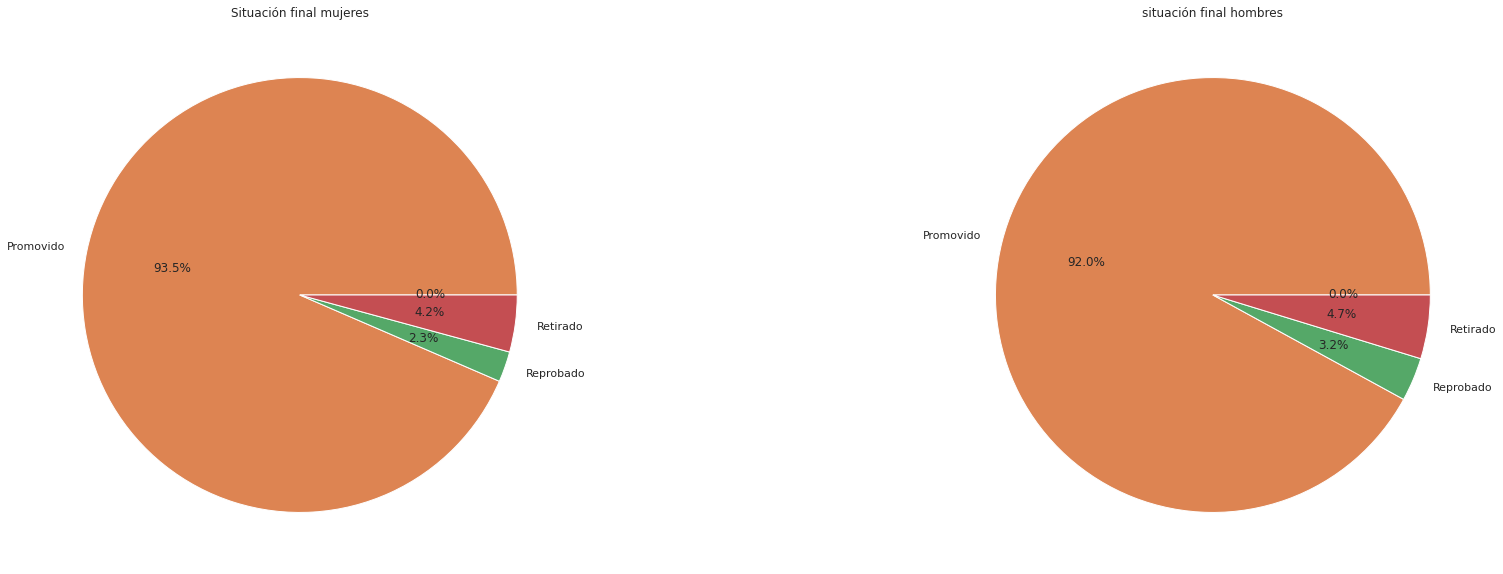

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10), sharey=True)

axs[0].pie(situacion_final_mujeres['CANTIDAD'], labels=situacion_final_mujeres['SIT_FIN'],autopct='%1.1f%%')
axs[1].pie(situacion_final_hombres['CANTIDAD'], labels=situacion_final_hombres['SIT_FIN'],autopct='%1.1f%%')
axs[0].title.set_text('Situación final mujeres')
axs[1].title.set_text('situación final hombres')
plt.show()

##Análisis del gráfico

En estos gráficos se ve que las mujeres reprueban menos que los hombres y que la cantidad de mujeres retiradas también es menor que a la de los hombres.

# Análisis de la situación final de los estudiantes con respecto a su asistencia a clase

Se busca conocer la relación entre los alumnos reprobrados y sus inasistencias a clase y poder compararlos para ver si existe alguna marcada diferencia con respecto a los que mas asisten en promedio

In [28]:
#agrupo la situacion final y el genero para saber de los promovieron, reprobaron y fueron retirados el promedio de asistencia(si el espacio esta en blanco no hay informacion) 
criterio_situacion_final_asistencia={'ASISTENCIA':'mean'}
situacion_final_asistencia= rendimiento.groupby(['GEN_ALU','SIT_FIN']).agg(criterio_situacion_final_asistencia)
#convierto la serie en varias columnas nuevamente
situacion_final_asistencia=situacion_final_asistencia.reset_index()
#Se cambian los codigos por datos mas legibles
dict_genalu_situacion_final_asistencia={0:'Sin información',1:'Masculino',2:'Femenino'}
situacion_final_asistencia['GEN_ALU'] = situacion_final_asistencia.GEN_ALU.replace(dict_genalu_situacion_final_asistencia)
dict_situacion_situacion_final_asistencia={'P':'Promovido','R':'Reprobado','Y':'Retirado'}
situacion_final_asistencia['SIT_FIN'] = situacion_final_asistencia.SIT_FIN.replace(dict_situacion_situacion_final_asistencia)

situacion_final_asistencia

,GEN_ALU,SIT_FIN,ASISTENCIA
0,Sin información,Promovido,87.000000
1,Sin información,Retirado,0.000000
2,Masculino,,41.860465
3,Masculino,Promovido,89.352473
4,Masculino,Reprobado,61.077528
5,Masculino,Retirado,0.008589
6,Femenino,,46.666667
7,Femenino,Promovido,89.377433
8,Femenino,Reprobado,59.496322
9,Femenino,Retirado,0.012319


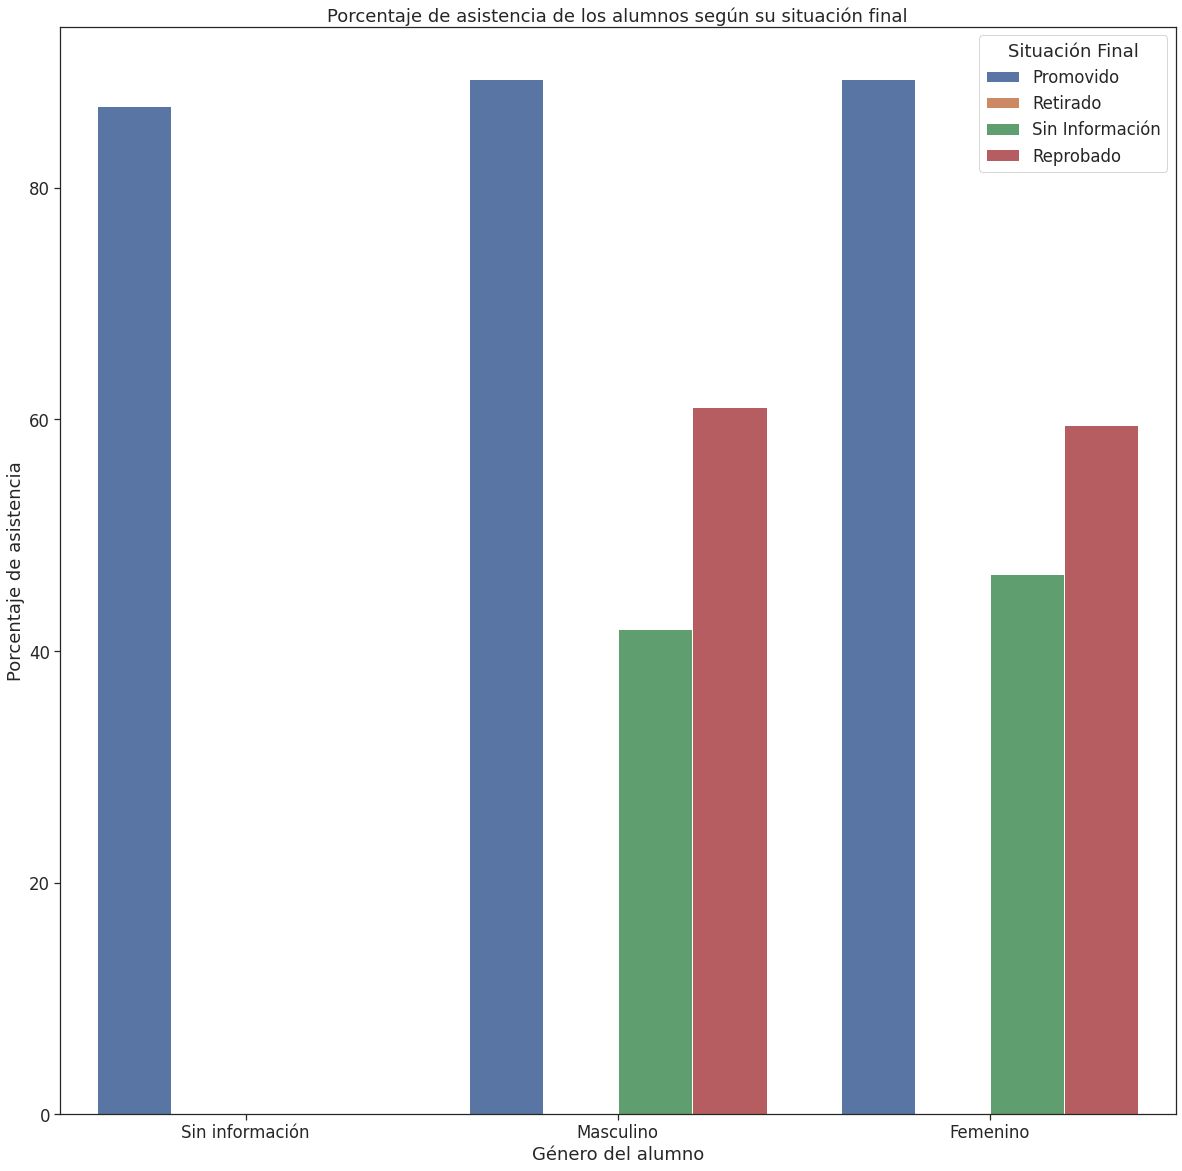

In [29]:
plt.figure(figsize=(20,20))
sns.set_theme(style="ticks", font_scale=1.5)
fig_situacion_final_asistencia = sns.barplot(data=situacion_final_asistencia, x='GEN_ALU', y='ASISTENCIA', hue='SIT_FIN')
fig_situacion_final_asistencia.set(xlabel="Género del alumno",ylabel="Porcentaje de asistencia",title="Porcentaje de asistencia de los alumnos según su situación final")
plt.legend(title="Situación final")
hands, labs = fig_situacion_final_asistencia.get_legend_handles_labels()
plt.legend(handles=hands, labels=['Promovido','Retirado','Sin Información','Reprobado'],title="Situación Final")

plt.show(fig_situacion_final_asistencia)

#Análisis del gráfico
En la gráfica se muestra que los aprobados tienen una alta tasa de asistencia mientras que los reprobados en promedio llegan un poco por encima del 60% de asistencia. Por ultimo es de notar que los alumnos con situación final 'retirado' solo tienen un porcentaje promedio de asistencia del 0.012319% por el lado femenino y del lado masculino el 0.008589%.

# Análisis de la edad de los alumnos adultos

In [30]:
#Necesito saber que datos estan mal dentro de la columna EDAD_ALU para posteriormente poder limpiarlos
rendimiento.EDAD_ALU.unique()

array(['54', '32', '24', '51', '43', '25', '28', '37', '48', '19', '29',
       '15', '14', '16', '17', '13', '18', '20', '39', '31', '42', '21',
       '66', '23', '52', '47', '30', '40', '26', '33', '38', '22', '45',
       '36', '27', '50', '34', '62', '35', '41', '46', '60', '56', '49',
       '53', '44', '64', '55', '74', '59', '61', '57', '63', '6', '7',
       '8', '9', '10', '11', '12', '5', ' ', '72', '67', '65', '58', '68',
       13, 14, 6, 7, 8, 9, 10, 11, 12, 16, 15, 18, 17, 19, 20, '73', 57,
       28, 36, 42, 48, 26, 32, 21, 31, 44, 23, 27, 33, 25, 43, 38, 29, 22,
       30, 37, 34, 39, 50, 46, 41, 24, 40, 49, 47, 51, 59, 35, 45, 60, 56,
       53, 52, '70', 5, 63, 61, 62, 67, 58, 55, '71', '75', 80, 69, 73,
       54, 72, 85, 75, 81, 77, 68, 66, 76, 70, '69', '76', 65, 4, '81',
       '80', 79, 64, '4', '82', '78', 71, 74, 78, 82, 89, '84', '77',
       '85', '2', '79', '83', '87', 84, 83, '3'], dtype=object)

In [31]:
#Se realiza una limpieza de la columna de edades para poder realizar el grafico
def limpia_edad(x):
  try:
    return int(x)
  except ValueError:
    return 0
rendimiento.EDAD_ALU = rendimiento.EDAD_ALU.apply(limpia_edad)

In [32]:
#Filtramos los alumnos para que se realice el analisis solo con los alumnos adultos
dict_adultos_edades_aux={1:'Masculino',2:'Femenino'}
rendimiento['GEN_ALU'] = rendimiento.GEN_ALU.replace(dict_adultos_edades_aux)
adultos_edades_aux=rendimiento[(rendimiento["COD_ENSE2"].isin([6,8])) &  (rendimiento["GEN_ALU"].isin(['Masculino','Femenino']))&(rendimiento["EDAD_ALU"]!=0)]

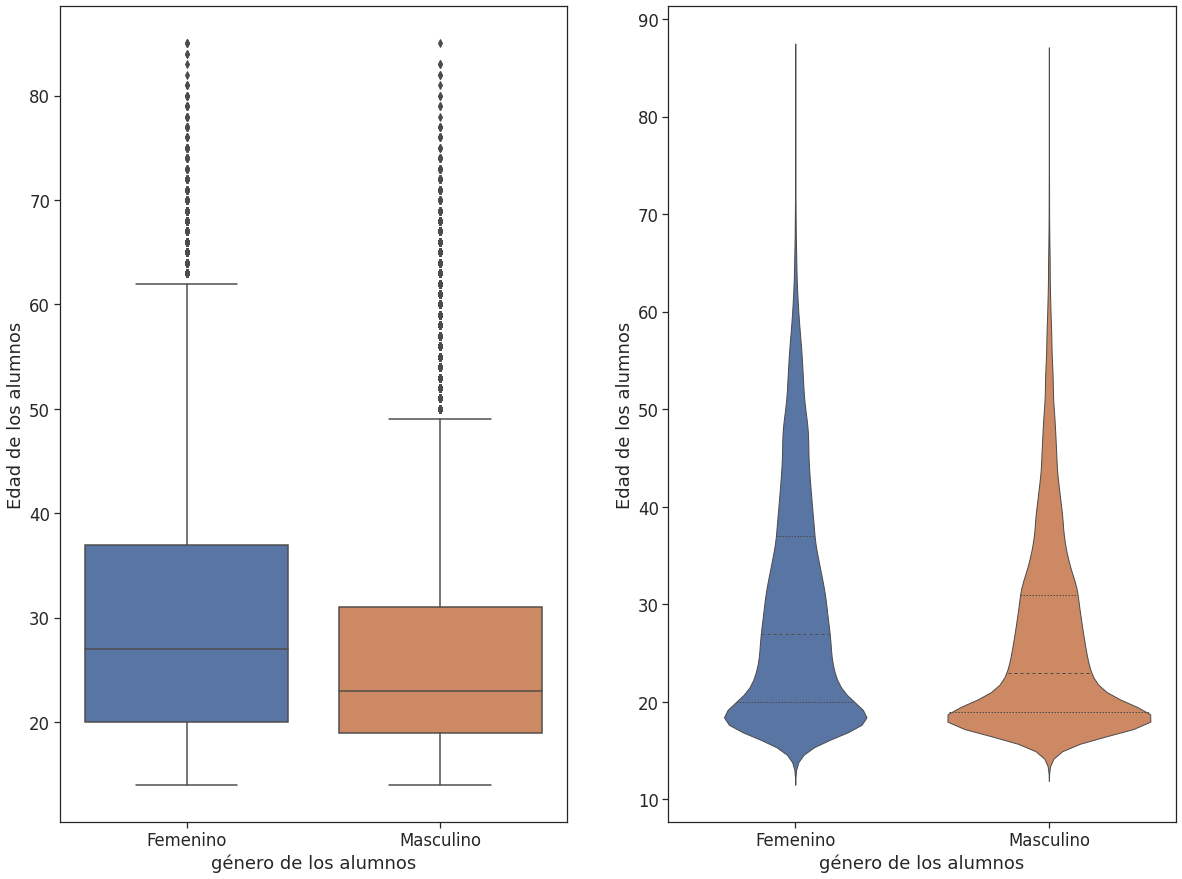

In [33]:
fig_proms_alu_gral, axes = plt.subplots(1, 2,figsize=(20,15))
sns.set_theme(style="ticks", font_scale=1.5)
sns.boxplot(x="GEN_ALU", y="EDAD_ALU",data=adultos_edades_aux,ax=axes[0])
sns.violinplot(x="GEN_ALU", y="EDAD_ALU",data=adultos_edades_aux, 
               split=True, inner="quart", linewidth=1,ax=axes[1])
fig.suptitle("Análisis de la edad de los alumnos adultos")
axes[0].set_ylabel("Edad de los alumnos")
axes[1].set_ylabel("Edad de los alumnos")
axes[0].set_xlabel("género de los alumnos")
axes[1].set_xlabel("género de los alumnos")
plt.show()

#Análisis de gráficos de alumnos adultos

Para realizar el analisis por edades de los estudiantes en chile para el año 2021 utilizamos dos graficos para representar los resultados, al lado izquierdo el de caja y al lado derecho el de violin. El grafico de caja nos indica que para el sexo femenino la edad en cuartil inferior es mucho mayor que en el caso de los hombres, por ende la mediana de edad tambien es mayor (por encima de los 25 años para el genero femenino y para el genero masculino por debajo de 25 años de edad) y en caso de analizar los cuartiles superiores podemos ver que en el caso del genero femenino toca una edad por encima de los 35 años y en el genero masculino una edad por debajo de los 35 años. Con esto se podria resumir que el genero femenino suele tener un promedio en cuanto a edad de estudio frente al genero masculino. 

El grafico de violin nos sirve para complementar mucho mas la informacion y entender en donde se encuentra el mayor grupo de estudiantes respecto a su edad, para los dos generos vemos una homogeneidad respecto a la edad, ya que por debajo de los 20 años se encuentra la mayor parte de la muestra. 


# Análisis de los promedios generales de los alumnos
Para conocer el rendimiento de los alumnos debemos saber como son los promedios en cada uno de los generos.

In [34]:
#Para poder realizar el análisis debo limpiar la informacion
rendimiento.PROM_GRAL.unique()

array(['6,5', '5,8', '0', '4,1', '4,8', '6,8', '5,6', '5,5', '6,4', '5,1',
       '5,2', '5,3', '2,4', '5,9', '5', '2,1', '4,9', '6', '5,4', '6,2',
       '6,1', '5,7', '6,6', '6,7', '2,5', '4,6', '3,1', '2,3', '4,5',
       '4,3', '4,7', '2', '3', '6,3', '3,5', '2,9', '4,4', '3,3', '3,6',
       '4', '3,4', '3,7', '6,9', '7', '3,8', '4,2', '3,9', '2,6', '3,2',
       '2,8', '2,7', '2,2', '1,9', '1,2', '1', '1,6', '1,1', '1,3', '1,5',
       '1,8', '1,4', '1,7'], dtype=object)

In [35]:
#Para que python me tome correctamente los numeros y me los transforme a float 
#primero debo cambiarles la , por un . y de ahi si transformar todo a float 
#para despues realizar el analisis
def limpia_prom(x):
  try:
    return float(x.replace(',','.'))
  except ValueError:
    return 10
rendimiento.PROM_GRAL = rendimiento.PROM_GRAL.apply(limpia_prom)

In [36]:
rendimiento.PROM_GRAL.unique()

array([6.5, 5.8, 0. , 4.1, 4.8, 6.8, 5.6, 5.5, 6.4, 5.1, 5.2, 5.3, 2.4,
       5.9, 5. , 2.1, 4.9, 6. , 5.4, 6.2, 6.1, 5.7, 6.6, 6.7, 2.5, 4.6,
       3.1, 2.3, 4.5, 4.3, 4.7, 2. , 3. , 6.3, 3.5, 2.9, 4.4, 3.3, 3.6,
       4. , 3.4, 3.7, 6.9, 7. , 3.8, 4.2, 3.9, 2.6, 3.2, 2.8, 2.7, 2.2,
       1.9, 1.2, 1. , 1.6, 1.1, 1.3, 1.5, 1.8, 1.4, 1.7])

In [37]:
promedios_grales=rendimiento[(rendimiento["GEN_ALU"].isin(['Masculino','Femenino']))]

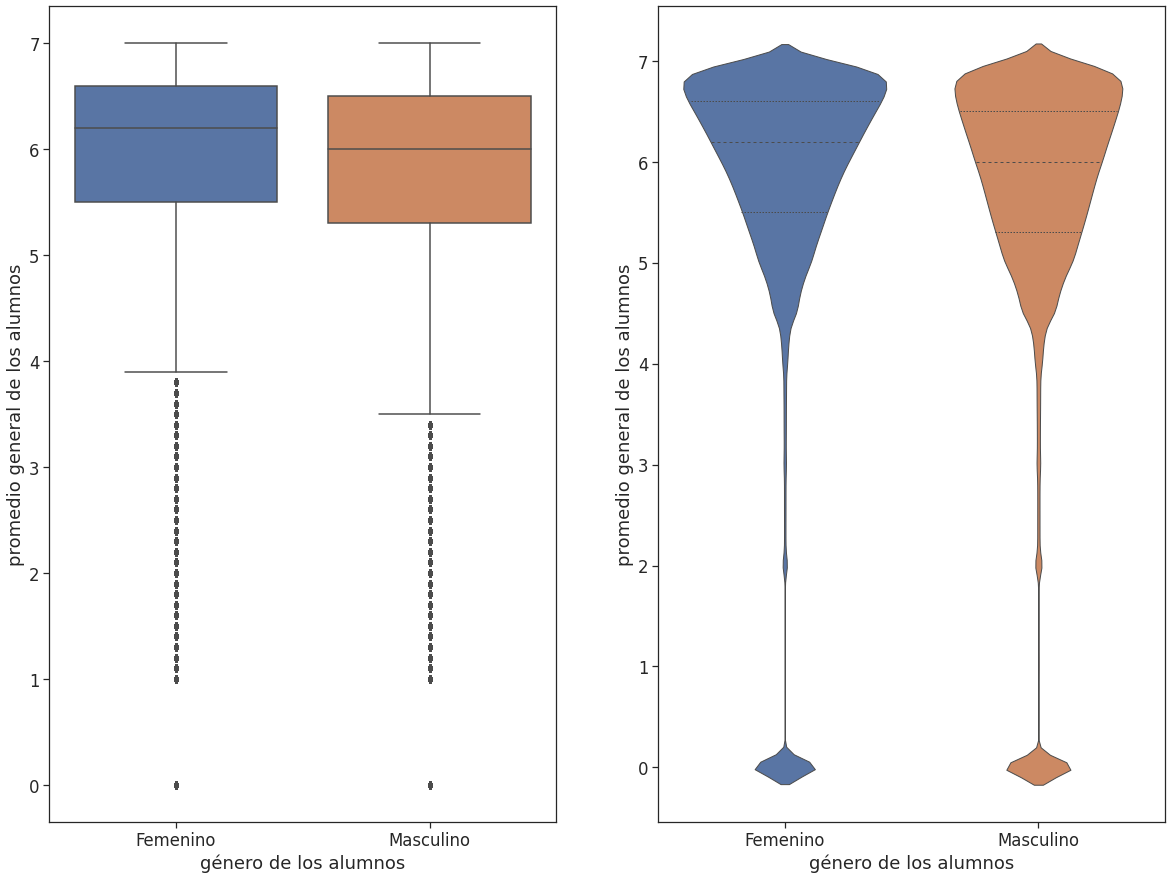

In [38]:
fig_proms_alu_gral, axes = plt.subplots(1, 2,figsize=(20,15))
sns.set_theme(style="ticks", font_scale=1.5)
sns.boxplot(x="GEN_ALU", y="PROM_GRAL",data=promedios_grales,ax=axes[0])
sns.violinplot(data=promedios_grales, x='GEN_ALU', y="PROM_GRAL", 
               split=True, inner="quart", linewidth=1,ax=axes[1])
fig.suptitle("Gráfico de los promedios de los alumnos segun género")
axes[0].set_ylabel("promedio general de los alumnos")
axes[1].set_ylabel("promedio general de los alumnos")
axes[0].set_xlabel("género de los alumnos")
axes[1].set_xlabel("género de los alumnos")
plt.show()

#Análisis de los graficos
Para el analisis de el promedio de notas por genero en los estudiantes chilenos para el año 2021 decidimos intrepretarlo mediante dos graficos nuevamente, boxplot y violin, el grafico de boxplot nos indica que el genero femenino registra un mayor promedio de calificaciones respecto al genero masculino (mirando los cuartiles inferior y superior) y asi mismo es importante resaltar que analizando los extremos inferiores de ambos generos vemos que en el genero masculino el promedio en cuanto a resultados es peor comparandolo con el genero femenino. Por otra parte el grafico de violin nos sirve de complemnetacion para este analisis donde se puede evidenciar que para ambos generos el promedio de calificacion esta por encima del 6.5. 

#Resultado final de los análisis

En el sistema educativo chileno, para el año 2021, hubieron más alumnos hombres que mujeres. Pero cuando miramos el desempeño de las mujeres han tenido mejor rendimiento que los hombres evidenciandose ésto en el hecho de que han promovido un 93,5% de mujeres y un 92% de hombres. Pero reprobaron un 3,2% de hombres y un 2,3% de mujeres. En cuanto a los promedios, veremos una mayor frecuencia de mujeres con los promedios más altos. Ahora cuando vemos la situación de los alumnos adultos, los hombres reprueban tambien mas que las mujeres. 

También vemos que los alumnos en general prefieren más el doble turno (mañana y tarde) y dentro de sus preferencias lo que menos se elige es el turno noche. Es para destacar que hay mas alumnos hombres que mujeres, que los hombres eligen más la modalidad industrial mientras que las mujeres el técnico.


Por último del analisis se desprende que los alumnos se concentran mas en escuelas subvencionadas (tanto hombres como mujeres).